In [1]:
# !apt-get update && apt-get install libgl1 && Y
# !pip install opencv-python
from PIL import Image
import tensorflow as tf;
import os;
import numpy as np;
import matplotlib.pyplot as plt;
import cv2;
import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout;
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy;
import tensorflow_addons as tfa;
import tensorflow.math;
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras import regularizers
from tensorflow.keras import utils as np_utils
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape

import numpy as np

from sklearn.metrics import accuracy_score
from keras.datasets import reuters
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )
# train_generator = datagen.flow(x_train, y_train, batch_size=64)
# emotion_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# emotion_model.fit(train_generator, epochs=1)

In [3]:
def f1er(f1):
    sum = 0;
    for i in f1.result().numpy():
        sum += i;
    print("F1-Score =", sum/len(f1.result().numpy()));

In [4]:
# class_mode and label_mode are equal ?????
data = tf.keras.utils.image_dataset_from_directory("/kaggle/input/project/dataset/train", batch_size=64, image_size=(48, 48), color_mode="grayscale", shuffle=True, label_mode="categorical");

Found 28709 files belonging to 7 classes.


In [5]:
data_itr = data.as_numpy_iterator()

In [6]:
batch = data_itr.next()

In [7]:
batch[0].shape

(64, 48, 48, 1)

In [8]:
batch[1].shape

(64, 7)

In [9]:
data = data.map(lambda x, y: (x/255, y))

In [10]:
# Train and test

In [11]:
# Idk about the num below
len(data)

449

In [12]:
train_size = int(len(data)*.7)+1;
val_size = int(len(data)*.2)+1;
test_size = int(len(data)*.1);

In [13]:
train_size + test_size + val_size

449

In [14]:
train = data.take(train_size);
val = data.skip(train_size).take(val_size);
test = data.skip(train_size+val_size).take(test_size);

In [15]:
len(train.as_numpy_iterator().next())

2

In [16]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import os
# from tensorflow.keras.utils import load_img, img_to_array
# from keras.preprocessing.image import ImageDataGenerator
# from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
# from keras.models import Model,Sequential
# from tensorflow.keras.optimizers import Adam,SGD,RMSprop
# no_of_classes = 7

# emotion_model = Sequential()


# emotion_model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
# emotion_model.add(BatchNormalization())
# emotion_model.add(Activation('relu'))
# emotion_model.add(MaxPooling2D(pool_size = (2,2)))
# emotion_model.add(Dropout(0.25))


# emotion_model.add(Conv2D(128,(5,5),padding = 'same'))
# emotion_model.add(BatchNormalization())
# emotion_model.add(Activation('relu'))
# emotion_model.add(MaxPooling2D(pool_size = (2,2)))
# emotion_model.add(Dropout (0.25))


# emotion_model.add(Conv2D(512,(3,3),padding = 'same'))
# emotion_model.add(BatchNormalization())
# emotion_model.add(Activation('relu'))
# emotion_model.add(MaxPooling2D(pool_size = (2,2)))
# emotion_model.add(Dropout (0.25))


# emotion_model.add(Conv2D(512,(3,3), padding='same'))
# emotion_model.add(BatchNormalization())
# emotion_model.add(Activation('relu'))
# emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
# emotion_model.add(Dropout(0.25))

# emotion_model.add(Flatten())


# emotion_model.add(Dense(256))
# emotion_model.add(BatchNormalization())
# emotion_model.add(Activation('relu'))
# emotion_model.add(Dropout(0.25))



# emotion_model.add(Dense(512))
# emotion_model.add(BatchNormalization())
# emotion_model.add(Activation('relu'))
# emotion_model.add(Dropout(0.25))

# emotion_model.add(Dense(no_of_classes, activation='softmax'))



# opt = Adam(lr = 0.0001)
# emotion_model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

# CNN (adam)

In [17]:
def model_CNN(emotion_model):
    emotion_model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(48, 48, 1)))
    emotion_model.add(Conv2D(64, (3,3), 1, activation='relu'))
    emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
    emotion_model.add(Dropout(0.5))

    emotion_model.add(Conv2D(128, (3,3), 1, activation='relu'))
    emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
    emotion_model.add(Conv2D(128, (3,3), 1, activation='relu'))
    emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
    emotion_model.add(Dropout(0.5))

    emotion_model.add(Flatten())
    emotion_model.add(Dense(1024, activation='relu'))
    emotion_model.add(Dropout(0.5))
    emotion_model.add(Dense(7, activation='softmax'))
    return emotion_model;

In [18]:
# def model_buildz(emotion_model):
#     # Input layer for sequences of feature vectors
#     emotion_model.add(Input(shape=(None, 48*48)))
#     # Simple RNN layer with 128 hidden units
#     emotion_model.add(SimpleRNN(128, activation='tanh'))
#     emotion_model.add(Dropout(0.5))
#     # Output layer for emotion prediction
#     emotion_model.add(Dense(7, activation='softmax'))
#     return emotion_model;

In [19]:
emotion_model = Sequential()
modeler = model_CNN(emotion_model)
modeler.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [20]:
# from keras.utils import plot_model
# from keras.models import Model
# from keras.layers import Input
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers import Dropout
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPooling2D
# from keras.layers import concatenate

# iner = Input(shape = (48, 48, 1));

# # Branch 1
# conv1 = Conv2D(64, (3,3), 1, activation="relu")(iner);
# pool1 = MaxPooling2D(pool_size=(2, 2))(conv1);

# conv2 = Conv2D(64, (3,3), 1, activation="relu")(pool1);
# pool2 = MaxPooling2D(pool_size=(2, 2))(conv2);
# flat1 = Flatten()(pool1);

# # Branch 2
# conv3 = Conv2D(64, (3,3), 1, activation="relu")(iner);
# pool3 = MaxPooling2D(pool_size=(2, 2))(conv3);

# conv4 = Conv2D(64, (3,3), 1, activation="relu")(pool3);
# pool4 = MaxPooling2D(pool_size=(2, 2))(conv4);
# flat2 = Flatten()(pool3);

# # Final
# merger = concatenate([flat1, flat2]);
# hidden1 = Dense(2034, activation='relu')(merger);
# hidden2 = Dense(4068, activation='relu')(hidden1);
# final = Dense(7, activation='softmax')(hidden2);

# model = Model([flat1, flat2], final)
# model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# # https://machinelearningmastery.com/keras-functional-api-deep-learning/

In [21]:
modeler.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [22]:
# emotional_model = final

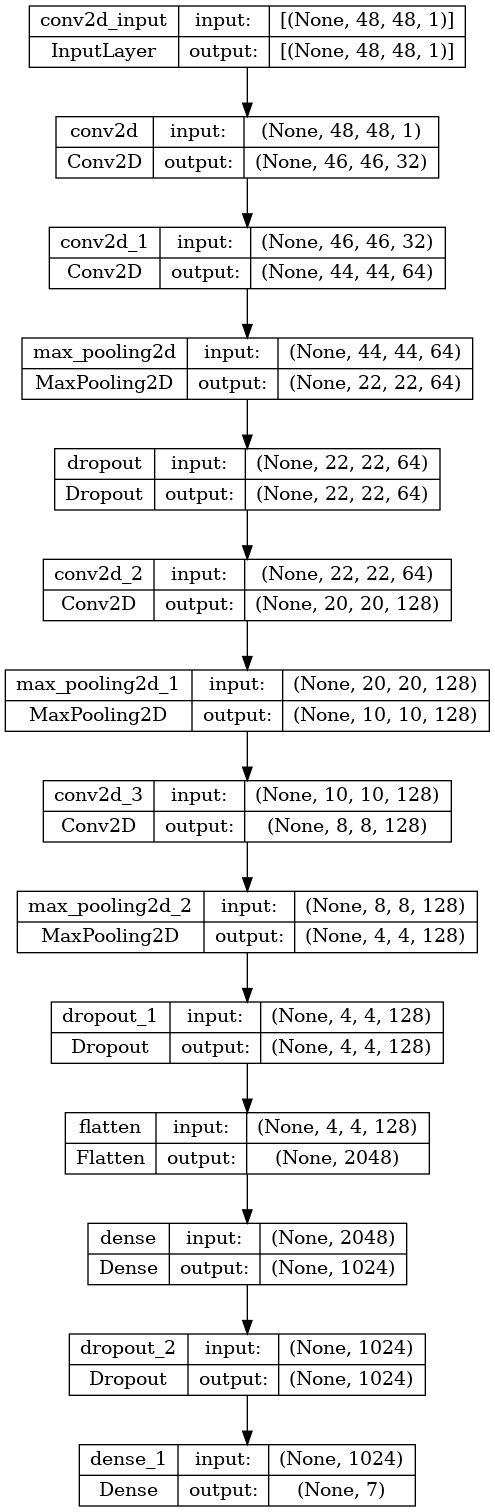

In [23]:
from keras.utils import plot_model
plot_model(modeler, to_file='model.png', show_shapes=True,show_layer_names=True)

In [24]:
tenz_callback = tf.keras.callbacks.TensorBoard(log_dir="./kaggle/input/project/logs");
info = modeler.fit(train, validation_data=val, epochs=50, callbacks=[tenz_callback]);

Epoch 1/50


2023-06-08 16:14:27.047728: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


315/315 [==============================] - 59s 148ms/step - loss: 1.8046 - accuracy: 0.2511 - val_loss: 1.7151 - val_accuracy: 0.3061
Epoch 2/50
315/315 [==============================] - 20s 63ms/step - loss: 1.6645 - accuracy: 0.3385 - val_loss: 1.5409 - val_accuracy: 0.4125
Epoch 3/50
315/315 [==============================] - 31s 99ms/step - loss: 1.5364 - accuracy: 0.4013 - val_loss: 1.4275 - val_accuracy: 0.4583
Epoch 4/50
315/315 [==============================] - 21s 67ms/step - loss: 1.4383 - accuracy: 0.4443 - val_loss: 1.3224 - val_accuracy: 0.5019
Epoch 5/50
315/315 [==============================] - 30s 95ms/step - loss: 1.3825 - accuracy: 0.4640 - val_loss: 1.2772 - val_accuracy: 0.5210
Epoch 6/50
315/315 [==============================] - 22s 68ms/step - loss: 1.3342 - accuracy: 0.4848 - val_loss: 1.2494 - val_accuracy: 0.5333
Epoch 7/50
315/315 [==============================] - 21s 66ms/step - loss: 1.2979 - accuracy: 0.4981 - val_loss: 1.2224 - val_accuracy: 0.5321
Ep

In [25]:
info.history

{'loss': [1.8045623302459717,
  1.6645488739013672,
  1.5364222526550293,
  1.438326358795166,
  1.3824697732925415,
  1.3342036008834839,
  1.2979055643081665,
  1.270556092262268,
  1.2442041635513306,
  1.2183163166046143,
  1.1971982717514038,
  1.1769840717315674,
  1.1760426759719849,
  1.1521086692810059,
  1.1431562900543213,
  1.1294432878494263,
  1.1048575639724731,
  1.0991154909133911,
  1.0841526985168457,
  1.075023889541626,
  1.0688420534133911,
  1.0578358173370361,
  1.0500073432922363,
  1.031218409538269,
  1.022706389427185,
  1.0124270915985107,
  0.9989045858383179,
  0.9933522343635559,
  0.9861457943916321,
  0.9942551255226135,
  0.97453373670578,
  0.973688542842865,
  0.9555084705352783,
  0.9598148465156555,
  0.9462798833847046,
  0.9425839185714722,
  0.9288278818130493,
  0.9279606938362122,
  0.9215169548988342,
  0.9074992537498474,
  0.8991302251815796,
  0.9041680097579956,
  0.9005436301231384,
  0.8858038187026978,
  0.8931588530540466,
  0.879804

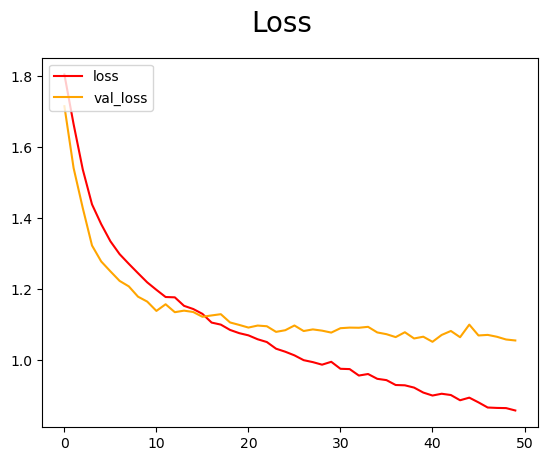

In [26]:
fig = plt.figure();
plt.plot(info.history["loss"], color="red", label="loss");
plt.plot(info.history["val_loss"], color="orange", label="val_loss");
fig.suptitle("Loss", fontsize="20");
plt.legend(loc="upper left");
plt.show()

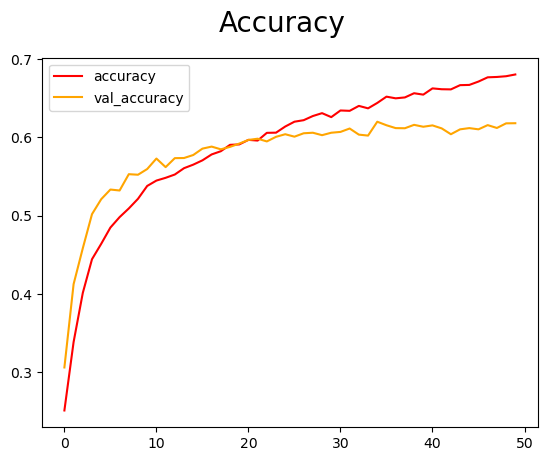

In [27]:
fig = plt.figure();
plt.plot(info.history["accuracy"], color="red", label="accuracy");
plt.plot(info.history["val_accuracy"], color="orange", label="val_accuracy");
fig.suptitle("Accuracy", fontsize="20");
plt.legend(loc="upper left");
plt.show()

In [28]:
prec = Precision();
rec = Recall();
acc = BinaryAccuracy();
f1 = tfa.metrics.F1Score(num_classes=7, average=None)

In [29]:
ys = [];
yers = [];
for i in test.as_numpy_iterator():
    x,y = i;
    yr = modeler.predict(x);
    print(yr)
    yers.append(yr);
    ys.append(y);
    f1.update_state(y, yr);
    prec.update_state(y, yr);
    acc.update_state(y, yr);
    rec.update_state(y,yr);
print("Precision : {}, Accuracy : {}, Recall : {}, F1-Score : {}".format(prec.result().numpy(), acc.result().numpy(), rec.result().numpy(),f1.result().numpy()))

2/2 [==============================] - 0s 6ms/step
[[5.17896354e-01 7.66749086e-04 1.11940399e-01 7.85476640e-02
  1.81753915e-02 1.25395417e-01 1.47278041e-01]
 [7.63447332e-08 9.47519407e-12 2.20760889e-02 2.50746825e-06
  2.55843069e-10 3.29291461e-09 9.77921307e-01]
 [1.26830205e-01 6.12218231e-02 3.73817503e-01 3.72199640e-02
  7.87685160e-03 3.40539217e-01 5.24944998e-02]
 [1.18207410e-02 2.98705301e-03 6.68138498e-03 8.97638917e-01
  6.88732341e-02 1.03616584e-02 1.63692294e-03]
 [1.10452950e-01 5.43887308e-03 4.06508744e-02 5.25005639e-01
  1.67171091e-01 1.37937486e-01 1.33430371e-02]
 [2.75904342e-04 1.33969735e-07 8.10694037e-05 9.65694070e-01
  3.36427055e-02 2.04802331e-04 1.01252517e-04]
 [3.93652804e-02 1.61912321e-04 1.76579654e-01 1.21993735e-03
  5.52706718e-02 1.10205486e-01 6.17197037e-01]
 [3.59016538e-01 1.02434561e-01 4.57781196e-01 2.30935533e-02
  1.41705908e-02 3.70099731e-02 6.49347063e-03]
 [2.21526534e-05 2.92790432e-08 2.03330310e-05 9.97222781e-01
  2.515

In [30]:
f1er(f1)

F1-Score = 0.5540651593889508


In [31]:
# model_json = modeler.to_json();
# with open("emotion_model.json", "w") as json_file:
#     json_file.write(model_json)
# modeler.save_weights('emotion_model.h5')

# RNN (adam)

In [32]:
def model_RNN(emotion_model):
    emotion_model.add(Reshape((48, 48), input_shape=(48, 48, 1)))
    emotion_model.add(LSTM(32, activation='relu', return_sequences=True))
    emotion_model.add(Dropout(0.5))

    emotion_model.add(LSTM(64, activation='relu', return_sequences=True))
    emotion_model.add(Dropout(0.5))

    emotion_model.add(LSTM(128, activation='relu', return_sequences=True))
    emotion_model.add(LSTM(128, activation='relu', return_sequences=True))
    emotion_model.add(Dropout(0.5))

    emotion_model.add(Flatten())
    emotion_model.add(Dense(1024, activation='relu'))
    emotion_model.add(Dropout(0.5))
    emotion_model.add(Dense(7, activation='softmax'))
    
    return emotion_model

In [33]:
emotion_model = Sequential()
modeler = model_RNN(emotion_model)
modeler.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [34]:
modeler.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 48, 48)            0         
                                                                 
 lstm (LSTM)                 (None, 48, 32)            10368     
                                                                 
 dropout_3 (Dropout)         (None, 48, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 48, 64)            24832     
                                                                 
 dropout_4 (Dropout)         (None, 48, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 48, 128)           98816     
                                                                 
 lstm_3 (LSTM)               (None, 48, 128)          

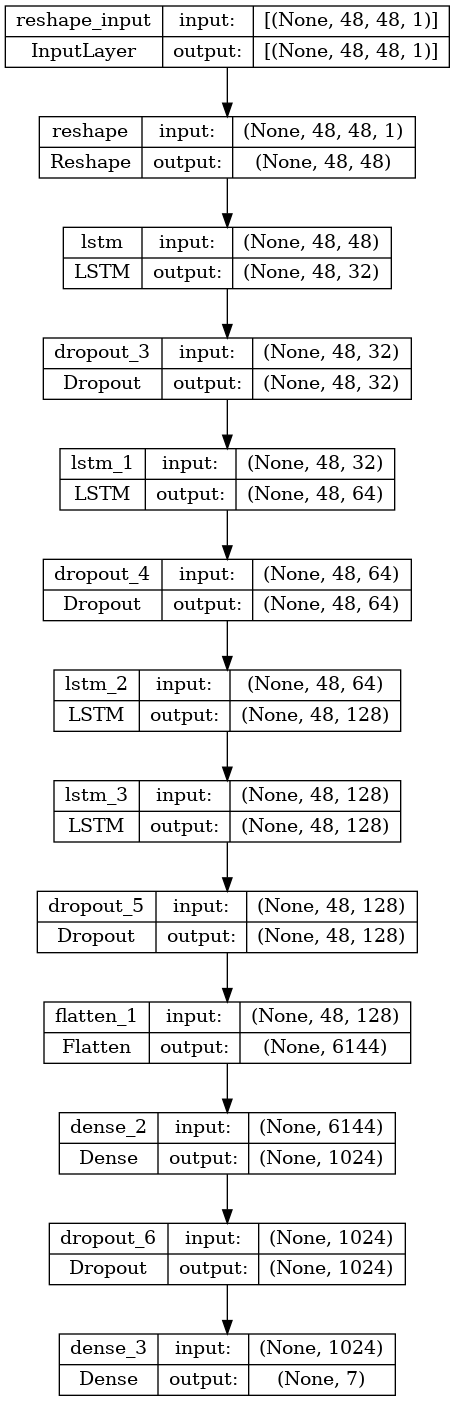

In [35]:
from keras.utils import plot_model
plot_model(modeler, to_file='model.png', show_shapes=True,show_layer_names=True)

In [36]:
info.history

{'loss': [1.8045623302459717,
  1.6645488739013672,
  1.5364222526550293,
  1.438326358795166,
  1.3824697732925415,
  1.3342036008834839,
  1.2979055643081665,
  1.270556092262268,
  1.2442041635513306,
  1.2183163166046143,
  1.1971982717514038,
  1.1769840717315674,
  1.1760426759719849,
  1.1521086692810059,
  1.1431562900543213,
  1.1294432878494263,
  1.1048575639724731,
  1.0991154909133911,
  1.0841526985168457,
  1.075023889541626,
  1.0688420534133911,
  1.0578358173370361,
  1.0500073432922363,
  1.031218409538269,
  1.022706389427185,
  1.0124270915985107,
  0.9989045858383179,
  0.9933522343635559,
  0.9861457943916321,
  0.9942551255226135,
  0.97453373670578,
  0.973688542842865,
  0.9555084705352783,
  0.9598148465156555,
  0.9462798833847046,
  0.9425839185714722,
  0.9288278818130493,
  0.9279606938362122,
  0.9215169548988342,
  0.9074992537498474,
  0.8991302251815796,
  0.9041680097579956,
  0.9005436301231384,
  0.8858038187026978,
  0.8931588530540466,
  0.879804

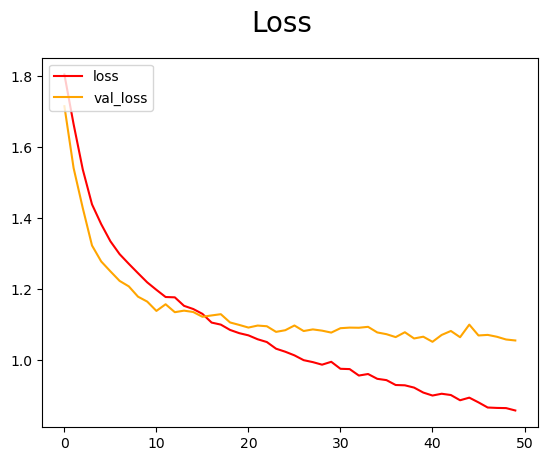

In [37]:
fig = plt.figure();
plt.plot(info.history["loss"], color="red", label="loss");
plt.plot(info.history["val_loss"], color="orange", label="val_loss");
fig.suptitle("Loss", fontsize="20");
plt.legend(loc="upper left");
plt.show()

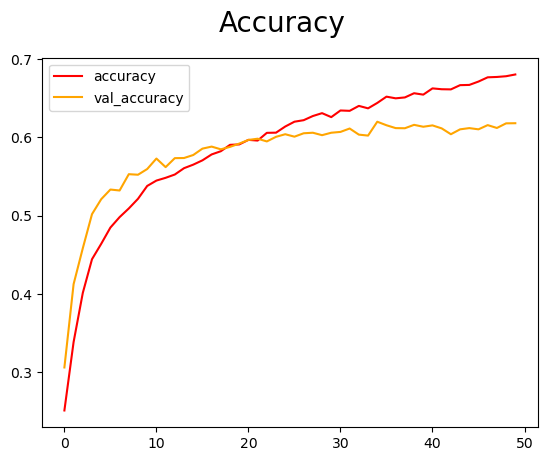

In [38]:
fig = plt.figure();
plt.plot(info.history["accuracy"], color="red", label="accuracy");
plt.plot(info.history["val_accuracy"], color="orange", label="val_accuracy");
fig.suptitle("Accuracy", fontsize="20");
plt.legend(loc="upper left");
plt.show()

In [39]:
prec = Precision();
rec = Recall();
acc = BinaryAccuracy();
f1 = tfa.metrics.F1Score(num_classes=7, average=None)

In [40]:
ys = [];
yers = [];
for i in test.as_numpy_iterator():
    x,y = i;
    yr = modeler.predict(x);
    yers.append(yr);
    ys.append(y);
    f1.update_state(y, yr);
    prec.update_state(y, yr);
    acc.update_state(y, yr);
    rec.update_state(y,yr);
print("Precision : {}, Accuracy : {}, Recall : {}, F1-Score : {}".format(prec.result().numpy(), acc.result().numpy(), rec.result().numpy(),f1.result().numpy()))

2/2 [==============================] - 1s 33ms/step
[[0.1478134  0.14183842 0.13668293 0.14017078 0.14128701 0.14516029
  0.14704719]
 [0.14785612 0.14087617 0.13720182 0.13953894 0.14106931 0.14579163
  0.14766599]
 [0.1475016  0.1407364  0.1376468  0.14035012 0.1406248  0.14492877
  0.14821151]
 [0.14676386 0.13998729 0.13757107 0.14039995 0.14127989 0.1458214
  0.14817654]
 [0.14876844 0.14113805 0.13605739 0.13927671 0.14091556 0.14580707
  0.14803676]
 [0.14797732 0.14030123 0.13634913 0.1399578  0.14106254 0.14578332
  0.14856872]
 [0.14832832 0.14194469 0.1361194  0.14005451 0.14116363 0.14525893
  0.14713049]
 [0.14689769 0.142733   0.13763008 0.14070322 0.14157617 0.14402987
  0.14642997]
 [0.14932254 0.14167555 0.13496123 0.13959913 0.1407397  0.14593807
  0.1477638 ]
 [0.14921449 0.14109868 0.13558942 0.13904494 0.14021143 0.14613163
  0.14870939]
 [0.14454998 0.14233375 0.14064221 0.1419313  0.14251293 0.14370875
  0.14432108]
 [0.1463313  0.14111558 0.13888668 0.14073807 0

In [41]:
f1er(f1)

F1-Score = 0.056960303868566244


In [42]:
from sklearn.metrics import confusion_matrix
pred = yers
y_true = ys

In [43]:
# yers

In [44]:
# ys

In [45]:
# cutoff = 0.7
# y_pred_classes = np.zeros_like(pred)
# y_pred_classes[np.asarray(pred) > cutoff] = 1

In [46]:
# CM = confusion_matrix(pred, y_true)
# from mlxtend.plotting import plot_confusion_matrix
# fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
# plt.show()

In [47]:
dir_path = "/kaggle/input/project/dataset/train/";
import os
lister = [];
for dir_name in os.listdir(dir_path):
    if os.path.isdir(os.path.join(dir_path, dir_name)):
        lister.append(dir_name);
lister = sorted(lister)
# print(lister)
x = 0;
actual = [];
image_extensions = ('.jpg', '.jpeg', '.png')
for i in lister:
    dir_path += i;
    for filename in os.listdir(dir_path):
        actual.append([i+"/"+filename, x]);
    dir_path = "/kaggle/input/project/dataset/train/";
    x += 1;

In [48]:
transposed = [[row[i] for row in actual] for i in range(len(actual[0]))]
# some stuff
data = []
for i in transposed[0]:
    image=cv2.imread(dir_path + i);
    img_arr = Image.fromarray(image);
    data.append(np.array(img_arr));


In [49]:
data = np.array(data);
labels = np.array(transposed[1]);
s=np.arange(data.shape[0]);
np.random.shuffle(s);
data=data[s];
labels=labels[s];
num_classes=len(np.unique(labels))
len_data=len(data)

In [50]:
from sklearn.model_selection import train_test_split
train_test_split(data,labels, test_size=0.2, random_state=42, shuffle=True)
(x_train,x_test)=data[(int)(0.1*len_data):],data[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [51]:
#Doing One hot encoding as classifier has multiple classes
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [52]:
print(len(x_train[0][0][0]))
len(y_train[0])

3


7

In [53]:
# dir_path = "/kaggle/input/project/dataset/train/";
# from keras.models import Model
# layer_name = "dense_2";
# btw_layer = Model(inputs=emotion_model.input, outputs=emotion_model.get_layer(layer_name).output);
# x = [];
# for img_name in transposed[0]:
#     img = cv2.imread(dir_path+img_name)
#     if img.shape[-1] == 1:
#         img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
#     img = np.array(img)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = cv2.resize(gray, (48,48))
#     i = img_to_array(img);
#     i = np.expand_dims(i, axis=0);
#     i = preprocess_input(i);
#     btw_output = btw_layer.predict(i);
#     features = np.squeeze(btw_output);
#     x.append(features);

# y = transposed[1];
# # KNN


## Regularization

### L2 and L1

In [54]:
# emotion_model = Sequential()

# emotion_model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(48, 48, 1)))
# emotion_model.add(Conv2D(64, (3,3), 1, activation='relu'))
# emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

# emotion_model.add(Conv2D(128, (3,3), 1, activation='relu'))
# emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
# emotion_model.add(Conv2D(128, (3,3), 1, activation='relu'))
# emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

# emotion_model.add(Flatten())
# emotion_model.add(Dense(1024, activation='relu'))
# emotion_model.add(Dense(500,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
# emotion_model.add(Dense(7, activation='softmax'))

# emotion_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [55]:
# emotion_model.summary()

In [56]:
from keras.callbacks import EarlyStopping
earlystop= EarlyStopping(monitor='val_acc', patience=3)
epochs = 20
batch_size = 256

In [57]:
# from keras.utils import plot_model
# plot_model(emotion_model, to_file='model.png', show_shapes=True,show_layer_names=True)

In [58]:
# tenz_callback = tf.keras.callbacks.TensorBoard(log_dir="./kaggle/input/project/logs");
# info = emotion_model.fit(train, validation_data=val, epochs=25, callbacks=[earlystop]);

In [59]:
# fig = plt.figure();
# plt.plot(info.history["loss"], color="red", label="loss");
# plt.plot(info.history["val_loss"], color="orange", label="val_loss");
# fig.suptitle("Loss", fontsize="20");
# plt.legend(loc="upper left");
# plt.show()

In [60]:
# fig = plt.figure();
# plt.plot(info.history["accuracy"], color="red", label="accuracy");
# plt.plot(info.history["val_accuracy"], color="orange", label="val_accuracy");
# fig.suptitle("Accuracy", fontsize="20");
# plt.legend(loc="upper left");
# plt.show()

In [61]:
# prec = Precision();
# rec = Recall();
# acc = BinaryAccuracy();
# f1 = tfa.metrics.F1Score(num_classes=7, average=None);

In [62]:
# ys = [];
# yers = [];
# for i in test.as_numpy_iterator():
#     x,y = i;
#     yr = emotion_model.predict(x);
#     yers.append(yr);
#     ys.append(y);
#     f1.update_state(y, yr);
#     prec.update_state(y, yr);
#     acc.update_state(y, yr);
#     rec.update_state(y,yr);
# print("Precision : {}, Accuracy : {}, Recall : {}, F1-Score : {}".format(prec.result().numpy(), acc.result().numpy(), rec.result().numpy(),f1.result().numpy()))

# Optimizers

# SGD

In [63]:
emotion_model = Sequential()
modeler = model_CNN(emotion_model)
modeler.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [64]:
tenz_callback = tf.keras.callbacks.TensorBoard(log_dir="./kaggle/input/project/logs");
info = modeler.fit(train, validation_data=val, epochs=50, callbacks=[earlystop]);

Epoch 1/50


2023-06-08 16:37:27.245109: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_7/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


315/315 [==============================] - 21s 61ms/step - loss: 1.8411 - accuracy: 0.2361 - val_loss: 1.8397 - val_accuracy: 0.2530
Epoch 2/50
315/315 [==============================] - 20s 64ms/step - loss: 1.8231 - accuracy: 0.2450 - val_loss: 1.8307 - val_accuracy: 0.2531
Epoch 3/50
315/315 [==============================] - 19s 61ms/step - loss: 1.8168 - accuracy: 0.2505 - val_loss: 1.8222 - val_accuracy: 0.2516
Epoch 4/50
315/315 [==============================] - 20s 63ms/step - loss: 1.8117 - accuracy: 0.2513 - val_loss: 1.8202 - val_accuracy: 0.2512
Epoch 5/50
315/315 [==============================] - 20s 63ms/step - loss: 1.8058 - accuracy: 0.2518 - val_loss: 1.8105 - val_accuracy: 0.2566
Epoch 6/50
315/315 [==============================] - 20s 64ms/step - loss: 1.7979 - accuracy: 0.2508 - val_loss: 1.8055 - val_accuracy: 0.2536
Epoch 7/50
315/315 [==============================] - 20s 64ms/step - loss: 1.7897 - accuracy: 0.2515 - val_loss: 1.7945 - val_accuracy: 0.2538
Epo

In [65]:
info.history

{'loss': [1.8410588502883911,
  1.8231253623962402,
  1.8167965412139893,
  1.8117166757583618,
  1.8057808876037598,
  1.7978980541229248,
  1.7897096872329712,
  1.7832050323486328,
  1.7775743007659912,
  1.7731863260269165,
  1.7676022052764893,
  1.756821632385254,
  1.7453206777572632,
  1.734660267829895,
  1.7230195999145508,
  1.713844656944275,
  1.7072054147720337,
  1.7011637687683105,
  1.6941370964050293,
  1.6906248331069946,
  1.6824740171432495,
  1.6797890663146973,
  1.6719502210617065,
  1.6674853563308716,
  1.6627546548843384,
  1.656299352645874,
  1.653836727142334,
  1.6438096761703491,
  1.6351374387741089,
  1.6330314874649048,
  1.627685308456421,
  1.6150414943695068,
  1.6113507747650146,
  1.6035594940185547,
  1.5959073305130005,
  1.5895228385925293,
  1.5784496068954468,
  1.578285574913025,
  1.5668703317642212,
  1.5598424673080444,
  1.5519193410873413,
  1.5444986820220947,
  1.5361248254776,
  1.5279611349105835,
  1.5268397331237793,
  1.51672327

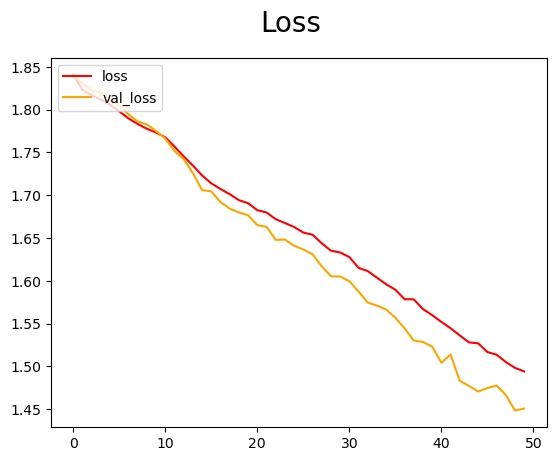

In [66]:
fig = plt.figure();
plt.plot(info.history["loss"], color="red", label="loss");
plt.plot(info.history["val_loss"], color="orange", label="val_loss");
fig.suptitle("Loss", fontsize="20");
plt.legend(loc="upper left");
plt.show()

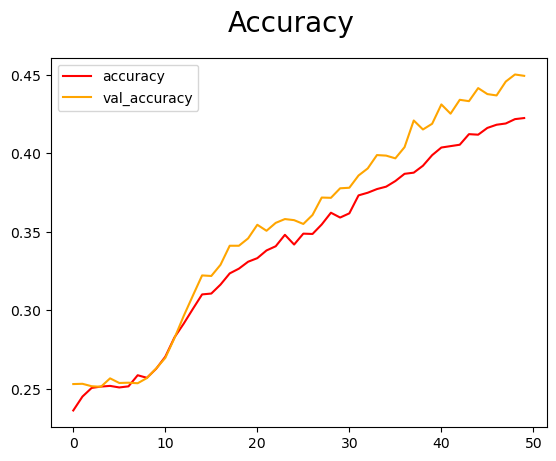

In [67]:
fig = plt.figure();
plt.plot(info.history["accuracy"], color="red", label="accuracy");
plt.plot(info.history["val_accuracy"], color="orange", label="val_accuracy");
fig.suptitle("Accuracy", fontsize="20");
plt.legend(loc="upper left");
plt.show()

In [68]:
prec = Precision();
rec = Recall();
acc = BinaryAccuracy();
f1 = tfa.metrics.F1Score(num_classes=7, average=None);
ys = [];
yers = [];
for i in test.as_numpy_iterator():
    x,y = i;
    yr = modeler.predict(x);
    yers.append(yr);
    ys.append(y);
    f1.update_state(y, yr);
    prec.update_state(y, yr);
    acc.update_state(y, yr);
    rec.update_state(y,yr);
print("Precision : {}, Accuracy : {}, Recall : {}, F1-Score : {}".format(prec.result().numpy(), acc.result().numpy(), rec.result().numpy(),f1.result().numpy()))
f1er(f1);

2/2 [==============================] - 0s 6ms/step
Precision : 0.7203390002250671, Accuracy : 0.8731240034103394, Recall : 0.18286123871803284, F1-Score : [0.26711187 0.         0.1372549  0.62917775 0.39332098 0.2814302
 0.57672846]
F1-Score = 0.32643202372959684


# rmsprop

In [70]:
emotion_model = Sequential()
modeler = model_CNN(emotion_model)
modeler.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['accuracy'])

In [71]:
tenz_callback = tf.keras.callbacks.TensorBoard(log_dir="./kaggle/input/project/logs");
info = modeler.fit(train, validation_data=val, epochs=50, callbacks=[earlystop]);

Epoch 1/50


2023-06-08 17:19:03.403121: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_10/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


315/315 [==============================] - 33s 96ms/step - loss: 1.7966 - accuracy: 0.2590 - val_loss: 1.6891 - val_accuracy: 0.3210
Epoch 2/50
315/315 [==============================] - 19s 59ms/step - loss: 1.6298 - accuracy: 0.3555 - val_loss: 1.5250 - val_accuracy: 0.4205
Epoch 3/50
315/315 [==============================] - 20s 63ms/step - loss: 1.5043 - accuracy: 0.4152 - val_loss: 1.4092 - val_accuracy: 0.4536
Epoch 4/50
315/315 [==============================] - 30s 96ms/step - loss: 1.4117 - accuracy: 0.4597 - val_loss: 1.3171 - val_accuracy: 0.5036
Epoch 5/50
315/315 [==============================] - 22s 68ms/step - loss: 1.3481 - accuracy: 0.4864 - val_loss: 1.2307 - val_accuracy: 0.5326
Epoch 6/50
315/315 [==============================] - 23s 73ms/step - loss: 1.2968 - accuracy: 0.5058 - val_loss: 1.2152 - val_accuracy: 0.5437
Epoch 7/50
315/315 [==============================] - 20s 62ms/step - loss: 1.2581 - accuracy: 0.5200 - val_loss: 1.1947 - val_accuracy: 0.5476
Epo

In [72]:
info.history

{'loss': [1.7965785264968872,
  1.629827618598938,
  1.5043132305145264,
  1.411673665046692,
  1.3480931520462036,
  1.2967785596847534,
  1.2580671310424805,
  1.227834939956665,
  1.1996338367462158,
  1.1748853921890259,
  1.1562968492507935,
  1.140499472618103,
  1.1219141483306885,
  1.1145581007003784,
  1.0948855876922607,
  1.0829570293426514,
  1.068461298942566,
  1.050323247909546,
  1.053859829902649,
  1.0375350713729858,
  1.0326201915740967,
  1.0251880884170532,
  1.0175706148147583,
  1.0168993473052979,
  1.0025064945220947,
  0.9976779222488403,
  0.9881983995437622,
  0.9919988512992859,
  0.9865025877952576,
  0.9797812700271606,
  0.9713377952575684,
  0.9772927761077881,
  0.9670121669769287,
  0.9652916193008423,
  0.9588754773139954,
  0.9491397142410278,
  0.9426103830337524,
  0.9552228450775146,
  0.9398201107978821,
  0.9376956820487976,
  0.9477072358131409,
  0.9347089529037476,
  0.9466967582702637,
  0.9283625483512878,
  0.9277870655059814,
  0.94172

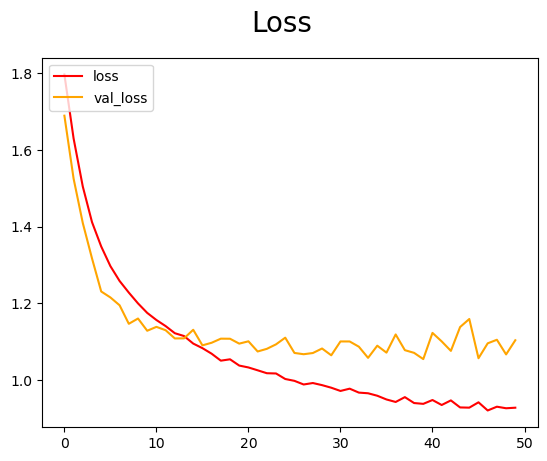

In [73]:
fig = plt.figure();
plt.plot(info.history["loss"], color="red", label="loss");
plt.plot(info.history["val_loss"], color="orange", label="val_loss");
fig.suptitle("Loss", fontsize="20");
plt.legend(loc="upper left");
plt.show()

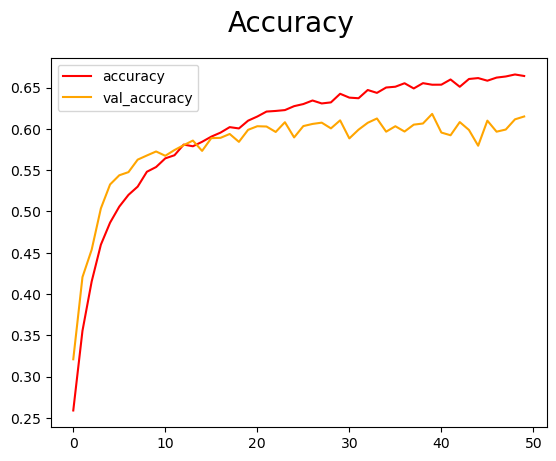

In [74]:
fig = plt.figure();
plt.plot(info.history["accuracy"], color="red", label="accuracy");
plt.plot(info.history["val_accuracy"], color="orange", label="val_accuracy");
fig.suptitle("Accuracy", fontsize="20");
plt.legend(loc="upper left");
plt.show()

In [75]:
prec = Precision();
rec = Recall();
acc = BinaryAccuracy();
f1 = tfa.metrics.F1Score(num_classes=7, average=None);
ys = [];
yers = [];
for i in test.as_numpy_iterator():
    x,y = i;
    yr = modeler.predict(x);
    yers.append(yr);
    ys.append(y);
    f1.update_state(y, yr);
    prec.update_state(y, yr);
    acc.update_state(y, yr);
    rec.update_state(y,yr);
print("Precision : {}, Accuracy : {}, Recall : {}, F1-Score : {}".format(prec.result().numpy(), acc.result().numpy(), rec.result().numpy(),f1.result().numpy()))
f1er(f1)

2/2 [==============================] - 0s 5ms/step
Precision : 0.8261260986328125, Accuracy : 0.8942273259162903, Recall : 0.32879167795181274, F1-Score : [0.4900662  0.4        0.3024911  0.78979176 0.55686986 0.47093597
 0.70826304]
F1-Score = 0.5312025632177081


# adagrad

In [76]:
emotion_model = Sequential()
modeler = model_CNN(emotion_model)
modeler.compile(loss='categorical_crossentropy', optimizer="adagrad", metrics=['accuracy'])

In [77]:
tenz_callback = tf.keras.callbacks.TensorBoard(log_dir="./kaggle/input/project/logs");
info = modeler.fit(train, validation_data=val, epochs=50, callbacks=[earlystop]);

Epoch 1/50


2023-06-08 17:37:34.240985: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_13/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


315/315 [==============================] - 21s 60ms/step - loss: 1.8892 - accuracy: 0.2065 - val_loss: 1.8539 - val_accuracy: 0.2562
Epoch 2/50
315/315 [==============================] - 20s 62ms/step - loss: 1.8335 - accuracy: 0.2396 - val_loss: 1.8415 - val_accuracy: 0.2543
Epoch 3/50
315/315 [==============================] - 19s 61ms/step - loss: 1.8288 - accuracy: 0.2447 - val_loss: 1.8381 - val_accuracy: 0.2559
Epoch 4/50
315/315 [==============================] - 18s 58ms/step - loss: 1.8266 - accuracy: 0.2452 - val_loss: 1.8372 - val_accuracy: 0.2521
Epoch 5/50
315/315 [==============================] - 20s 63ms/step - loss: 1.8236 - accuracy: 0.2440 - val_loss: 1.8341 - val_accuracy: 0.2545
Epoch 6/50
315/315 [==============================] - 19s 60ms/step - loss: 1.8216 - accuracy: 0.2460 - val_loss: 1.8342 - val_accuracy: 0.2538
Epoch 7/50
315/315 [==============================] - 19s 59ms/step - loss: 1.8201 - accuracy: 0.2484 - val_loss: 1.8314 - val_accuracy: 0.2547
Epo

In [78]:
info.history

{'loss': [1.889165997505188,
  1.8335307836532593,
  1.8288146257400513,
  1.826645851135254,
  1.8236455917358398,
  1.8215892314910889,
  1.8201361894607544,
  1.82049560546875,
  1.8183741569519043,
  1.8176718950271606,
  1.8184130191802979,
  1.8179080486297607,
  1.8151946067810059,
  1.8150708675384521,
  1.815537452697754,
  1.8145408630371094,
  1.8139162063598633,
  1.8133562803268433,
  1.8109431266784668,
  1.809605360031128,
  1.811719536781311,
  1.8094844818115234,
  1.8076934814453125,
  1.8077582120895386,
  1.8067091703414917,
  1.8058613538742065,
  1.8037893772125244,
  1.8026704788208008,
  1.801037073135376,
  1.7976335287094116,
  1.7969471216201782,
  1.7930753231048584,
  1.7923283576965332,
  1.7902004718780518,
  1.7876648902893066,
  1.7877463102340698,
  1.7868577241897583,
  1.7843748331069946,
  1.7836312055587769,
  1.7820115089416504,
  1.7804011106491089,
  1.7810248136520386,
  1.7800754308700562,
  1.7785465717315674,
  1.777193546295166,
  1.7756041

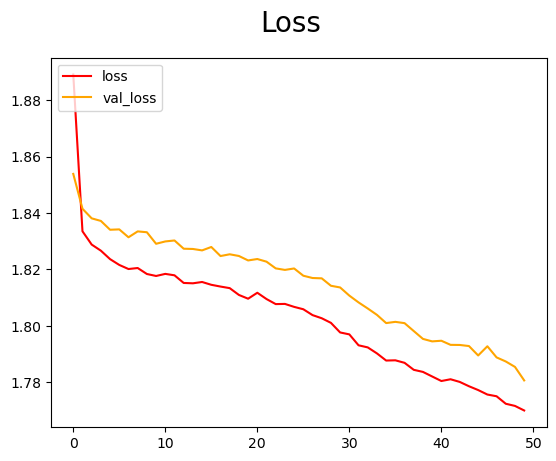

In [79]:
fig = plt.figure();
plt.plot(info.history["loss"], color="red", label="loss");
plt.plot(info.history["val_loss"], color="orange", label="val_loss");
fig.suptitle("Loss", fontsize="20");
plt.legend(loc="upper left");
plt.show()

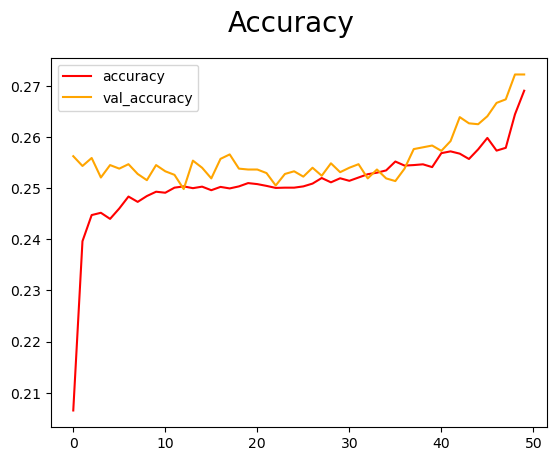

In [80]:
fig = plt.figure();
plt.plot(info.history["accuracy"], color="red", label="accuracy");
plt.plot(info.history["val_accuracy"], color="orange", label="val_accuracy");
fig.suptitle("Accuracy", fontsize="20");
plt.legend(loc="upper left");
plt.show()

In [81]:
prec = Precision();
rec = Recall();
acc = BinaryAccuracy();
f1 = tfa.metrics.F1Score(num_classes=7, average=None);
ys = [];
yers = [];
for i in test.as_numpy_iterator():
    x,y = i;
    yr = modeler.predict(x);
    yers.append(yr);
    ys.append(y);
    f1.update_state(y, yr);
    prec.update_state(y, yr);
    acc.update_state(y, yr);
    rec.update_state(y,yr);
print("Precision : {}, Accuracy : {}, Recall : {}, F1-Score : {}".format(prec.result().numpy(), acc.result().numpy(), rec.result().numpy(),f1.result().numpy()))
f1er(f1)

2/2 [==============================] - 0s 4ms/step
Precision : 0.0, Accuracy : 0.8571428656578064, Recall : 0.0, F1-Score : [0.         0.         0.         0.40642783 0.02505219 0.20325202
 0.24952015]
F1-Score = 0.1263217417789357


# SGD with momentum

In [82]:
from tensorflow.keras.optimizers import SGD
emotion_model = Sequential()
modeler = model_CNN(emotion_model)
modeler.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=1e-3, momentum=0.5, nesterov=False), metrics=['accuracy'])

In [83]:
tenz_callback = tf.keras.callbacks.TensorBoard(log_dir="./kaggle/input/project/logs");
info = modeler.fit(train, validation_data=val, epochs=50, callbacks=[earlystop]);

Epoch 1/50


2023-06-08 17:55:53.697970: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/dropout_16/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


315/315 [==============================] - 21s 63ms/step - loss: 1.8887 - accuracy: 0.2307 - val_loss: 1.8681 - val_accuracy: 0.2538
Epoch 2/50
315/315 [==============================] - 19s 60ms/step - loss: 1.8421 - accuracy: 0.2427 - val_loss: 1.8505 - val_accuracy: 0.2507
Epoch 3/50
315/315 [==============================] - 20s 62ms/step - loss: 1.8340 - accuracy: 0.2403 - val_loss: 1.8451 - val_accuracy: 0.2517
Epoch 4/50
315/315 [==============================] - 19s 61ms/step - loss: 1.8280 - accuracy: 0.2446 - val_loss: 1.8402 - val_accuracy: 0.2523
Epoch 5/50
315/315 [==============================] - 20s 64ms/step - loss: 1.8276 - accuracy: 0.2430 - val_loss: 1.8399 - val_accuracy: 0.2538
Epoch 6/50
315/315 [==============================] - 20s 61ms/step - loss: 1.8250 - accuracy: 0.2443 - val_loss: 1.8366 - val_accuracy: 0.2531
Epoch 7/50
315/315 [==============================] - 20s 62ms/step - loss: 1.8245 - accuracy: 0.2448 - val_loss: 1.8342 - val_accuracy: 0.2540
Epo

In [84]:
info.history

{'loss': [1.888674259185791,
  1.8421436548233032,
  1.8340332508087158,
  1.8279887437820435,
  1.827646017074585,
  1.8250069618225098,
  1.8244601488113403,
  1.8194376230239868,
  1.8202663660049438,
  1.818928837776184,
  1.817917823791504,
  1.8164362907409668,
  1.81647789478302,
  1.8156592845916748,
  1.8156031370162964,
  1.814687967300415,
  1.8132750988006592,
  1.8115391731262207,
  1.8115509748458862,
  1.809005856513977,
  1.8078268766403198,
  1.8087795972824097,
  1.8056104183197021,
  1.8043169975280762,
  1.8016180992126465,
  1.8002036809921265,
  1.7982076406478882,
  1.7934976816177368,
  1.7913450002670288,
  1.7926989793777466,
  1.7875949144363403,
  1.7878005504608154,
  1.7868918180465698,
  1.784938097000122,
  1.7830913066864014,
  1.7838361263275146,
  1.779839038848877,
  1.7807303667068481,
  1.7787915468215942,
  1.7772151231765747,
  1.7767014503479004,
  1.7770410776138306,
  1.7751257419586182,
  1.772444248199463,
  1.7724066972732544,
  1.771165490

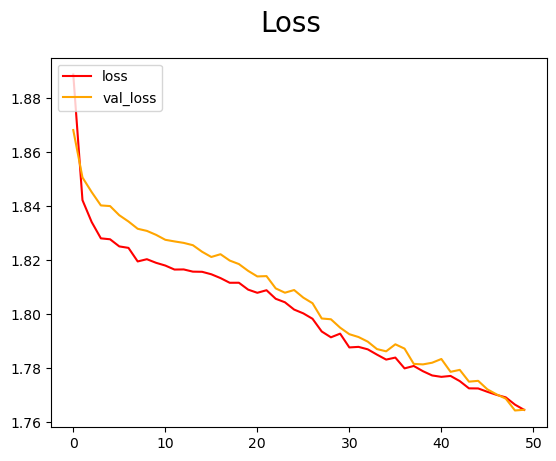

In [85]:
fig = plt.figure();
plt.plot(info.history["loss"], color="red", label="loss");
plt.plot(info.history["val_loss"], color="orange", label="val_loss");
fig.suptitle("Loss", fontsize="20");
plt.legend(loc="upper left");
plt.show()

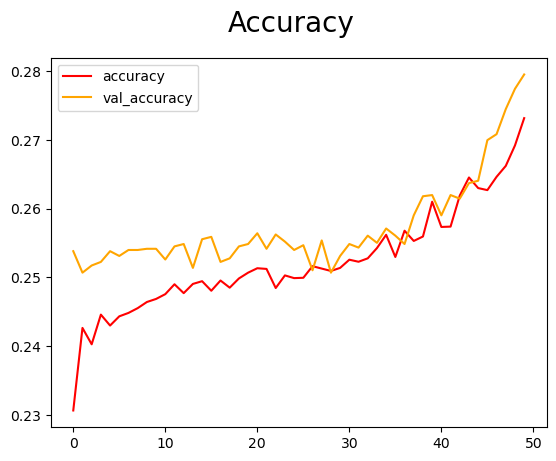

In [86]:
fig = plt.figure();
plt.plot(info.history["accuracy"], color="red", label="accuracy");
plt.plot(info.history["val_accuracy"], color="orange", label="val_accuracy");
fig.suptitle("Accuracy", fontsize="20");
plt.legend(loc="upper left");
plt.show()

In [87]:
prec = Precision();
rec = Recall();
acc = BinaryAccuracy();
f1 = tfa.metrics.F1Score(num_classes=7, average=None);
ys = [];
yers = [];
for i in test.as_numpy_iterator():
    x,y = i;
    yr = modeler.predict(x);
    yers.append(yr);
    ys.append(y);
    f1.update_state(y, yr);
    prec.update_state(y, yr);
    acc.update_state(y, yr);
    rec.update_state(y,yr);
print("Precision : {}, Accuracy : {}, Recall : {}, F1-Score : {}".format(prec.result().numpy(), acc.result().numpy(), rec.result().numpy(),f1.result().numpy()))
f1er(f1)

2/2 [==============================] - 0s 5ms/step
Precision : 0.0, Accuracy : 0.8571428656578064, Recall : 0.0, F1-Score : [0.01033592 0.         0.         0.4311896  0.10181818 0.23990208
 0.1448468 ]
F1-Score = 0.13258465299648897


# SGD with Nesterov Momentum

In [88]:
emotion_model = Sequential()
modeler = model_CNN(emotion_model)
modeler.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=1e-3, momentum=0.5, nesterov=True), metrics=['accuracy'])

In [ ]:
tenz_callback = tf.keras.callbacks.TensorBoard(log_dir="./kaggle/input/project/logs");
info = modeler.fit(train, validation_data=val, epochs=50, callbacks=[earlystop]);

Epoch 1/50


2023-06-08 18:16:36.408815: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_19/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


315/315 [==============================] - 21s 61ms/step - loss: 1.8778 - accuracy: 0.2255 - val_loss: 1.8665 - val_accuracy: 0.2531
Epoch 2/50
315/315 [==============================] - 20s 63ms/step - loss: 1.8429 - accuracy: 0.2405 - val_loss: 1.8557 - val_accuracy: 0.2490
Epoch 3/50
315/315 [==============================] - 19s 61ms/step - loss: 1.8364 - accuracy: 0.2402 - val_loss: 1.8512 - val_accuracy: 0.2516
Epoch 4/50
315/315 [==============================] - 20s 62ms/step - loss: 1.8297 - accuracy: 0.2460 - val_loss: 1.8448 - val_accuracy: 0.2517
Epoch 5/50
315/315 [==============================] - 20s 64ms/step - loss: 1.8275 - accuracy: 0.2447 - val_loss: 1.8428 - val_accuracy: 0.2524
Epoch 6/50
315/315 [==============================] - 20s 62ms/step - loss: 1.8250 - accuracy: 0.2449 - val_loss: 1.8411 - val_accuracy: 0.2530
Epoch 7/50
315/315 [==============================] - 22s 70ms/step - loss: 1.8231 - accuracy: 0.2471 - val_loss: 1.8362 - val_accuracy: 0.2542
Epo

In [ ]:
info.history

In [ ]:
fig = plt.figure();
plt.plot(info.history["loss"], color="red", label="loss");
plt.plot(info.history["val_loss"], color="orange", label="val_loss");
fig.suptitle("Loss", fontsize="20");
plt.legend(loc="upper left");
plt.show()

In [ ]:
fig = plt.figure();
plt.plot(info.history["accuracy"], color="red", label="accuracy");
plt.plot(info.history["val_accuracy"], color="orange", label="val_accuracy");
fig.suptitle("Accuracy", fontsize="20");
plt.legend(loc="upper left");
plt.show()

In [ ]:
prec = Precision();
rec = Recall();
acc = BinaryAccuracy();
f1 = tfa.metrics.F1Score(num_classes=7, average=None);
ys = [];
yers = [];
for i in test.as_numpy_iterator():
    x,y = i;
    yr = modeler.predict(x);
    yers.append(yr);
    ys.append(y);
    f1.update_state(y, yr);
    prec.update_state(y, yr);
    acc.update_state(y, yr);
    rec.update_state(y,yr);
print("Precision : {}, Accuracy : {}, Recall : {}, F1-Score : {}".format(prec.result().numpy(), acc.result().numpy(), rec.result().numpy(),f1.result().numpy()))
f1er(f1)

# AdaDelta

In [ ]:
emotion_model = Sequential()
modeler = model_CNN(emotion_model)
modeler.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adadelta(), metrics=['accuracy'])

In [ ]:
tenz_callback = tf.keras.callbacks.TensorBoard(log_dir="./kaggle/input/project/logs");
info = modeler.fit(train, validation_data=val, epochs=50, callbacks=[earlystop]);

In [ ]:
info.history

In [ ]:
fig = plt.figure();
plt.plot(info.history["loss"], color="red", label="loss");
plt.plot(info.history["val_loss"], color="orange", label="val_loss");
fig.suptitle("Loss", fontsize="20");
plt.legend(loc="upper left");
plt.show()

In [ ]:
fig = plt.figure();
plt.plot(info.history["accuracy"], color="red", label="accuracy");
plt.plot(info.history["val_accuracy"], color="orange", label="val_accuracy");
fig.suptitle("Accuracy", fontsize="20");
plt.legend(loc="upper left");
plt.show()

In [ ]:
prec = Precision();
rec = Recall();
acc = BinaryAccuracy();
f1 = tfa.metrics.F1Score(num_classes=7, average=None);
ys = [];
yers = [];
for i in test.as_numpy_iterator():
    x,y = i;
    yr = modeler.predict(x);
    yers.append(yr);
    ys.append(y);
    f1.update_state(y, yr);
    prec.update_state(y, yr);
    acc.update_state(y, yr);
    rec.update_state(y,yr);
print("Precision : {}, Accuracy : {}, Recall : {}, F1-Score : {}".format(prec.result().numpy(), acc.result().numpy(), rec.result().numpy(),f1.result().numpy()))
f1er(f1)

# Nadam

In [ ]:
emotion_model = Sequential()
modeler = model_CNN(emotion_model)
modeler.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-3), metrics=['accuracy'])

In [ ]:
tenz_callback = tf.keras.callbacks.TensorBoard(log_dir="./kaggle/input/project/logs");
info = modeler.fit(train, validation_data=val, epochs=50, callbacks=[earlystop]);

In [ ]:
info.history

In [ ]:
fig = plt.figure();
plt.plot(info.history["loss"], color="red", label="loss");
plt.plot(info.history["val_loss"], color="orange", label="val_loss");
fig.suptitle("Loss", fontsize="20");
plt.legend(loc="upper left");
plt.show()

In [ ]:
fig = plt.figure();
plt.plot(info.history["accuracy"], color="red", label="accuracy");
plt.plot(info.history["val_accuracy"], color="orange", label="val_accuracy");
fig.suptitle("Accuracy", fontsize="20");
plt.legend(loc="upper left");
plt.show()

In [ ]:
prec = Precision();
rec = Recall();
acc = BinaryAccuracy();
f1 = tfa.metrics.F1Score(num_classes=7, average=None);
ys = [];
yers = [];
for i in test.as_numpy_iterator():
    x,y = i;
    yr = modeler.predict(x);
    yers.append(yr);
    ys.append(y);
    f1.update_state(y, yr);
    prec.update_state(y, yr);
    acc.update_state(y, yr);
    rec.update_state(y,yr);
print("Precision : {}, Accuracy : {}, Recall : {}, F1-Score : {}".format(prec.result().numpy(), acc.result().numpy(), rec.result().numpy(),f1.result().numpy()))
f1er(f1)

# RNN

In [ ]:
def vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(1, input_shape = (48,1), return_sequences = False))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [ ]:
model = KerasClassifier(build_fn = vanilla_rnn, epochs = 50, batch_size = 50, verbose = 1)

In [ ]:
train.as_numpy_iterator().next()[0].shape


In [ ]:
model.fit(train.as_numpy_iterator().next()[0], train.as_numpy_iterator().next()[1])

In [ ]:
model.fit(x_train, y_train)

In [ ]:
len(x_train[0])


In [ ]:
len(y_train)


In [ ]:
len(train.as_numpy_iterator().next()[0])

## Data Augmentation

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# Aug_Data = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, zca_whitening=False, rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=False, vertical_flip=False);
# Aug_Data.fit(x_train);

In [ ]:
# from keras.callbacks import EarlyStopping
# earlystop= EarlyStopping(monitor='val_acc', patience=3)
# epochs = 20 # 
# batch_size = 256

In [ ]:
# history = model.fit_generator(Aug_Data.flow(x_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = (x_test,y_test),
#                               verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

In [ ]:
# history = emotion_model.fit(Aug_Data.flow(x_train, y_train, batch_size=32,subset='training'),validation_data=Aug_Data.flow(x_test, y_test,batch_size=8, subset='validation'),steps_per_epoch=len(x_train) / 32, epochs=epochs)